In [1]:
import gymnasium as gym
from vectorhash import build_vectorhash_architecture
from shifts import RatShift
from smoothing import RatSLAMSmoothing
import miniworld
from miniworld.params import DEFAULT_PARAMS
from miniworld_agent import MiniworldVectorhashAgent
import math
from preprocessing_cnn import PreprocessingCNN
import torch
from graph_utils import plot_imgs_side_by_side
from matplotlib import pyplot as plt
from graph_utils import error_test
import copy


### vhash
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
shapes = [(5, 5, 5), (8, 8, 8)]
N = 10


def make_env():
    params = DEFAULT_PARAMS.copy().no_random()
    # [
    #     "MiniWorld-CollectHealth-v0",
    #     "MiniWorld-FourRooms-v0",
    #     "MiniWorld-Hallway-v0",
    #     "MiniWorld-Maze-v0",
    #     "MiniWorld-MazeS2-v0",
    #     "MiniWorld-MazeS3-v0",
    #     "MiniWorld-MazeS3Fast-v0",
    #     "MiniWorld-OneRoom-v0",
    #     "MiniWorld-OneRoomS6-v0",
    #     "MiniWorld-OneRoomS6Fast-v0",
    #     "MiniWorld-PickupObjects-v0",
    #     "MiniWorld-PutNext-v0",
    #     "MiniWorld-RoomObjects-v0",
    #     "MiniWorld-Sidewalk-v0",
    #     "MiniWorld-Sign-v0",
    #     "MiniWorld-TMaze-v0",
    #     "MiniWorld-TMazeLeft-v0",
    #     "MiniWorld-TMazeRight-v0",
    #     "MiniWorld-ThreeRooms-v0",
    #     "MiniWorld-WallGap-v0",
    #     "MiniWorld-YMaze-v0",
    #     "MiniWorld-YMazeLeft-v0",
    #     "MiniWorld-YMazeRight-v0",
    # ]
    env = gym.make(
        "MiniWorld-CollectHealth-v0",
        max_episode_steps=-1,
        params=params,
        domain_rand=False,
    )
    min_x = env.get_wrapper_attr("min_x")
    max_x = env.get_wrapper_attr("max_x")
    min_z = env.get_wrapper_attr("min_z")
    max_z = env.get_wrapper_attr("max_z")

    limits = torch.tensor([max_x - min_x, max_z - min_z, 2 * math.pi]).float()
    return env, limits


env, limits = make_env()
model = build_vectorhash_architecture(
    shapes,
    N_h=600,
    input_size=128,
    initalization_method="by_sparsity",
    limits=limits,
    device=device,
    shift=RatShift(),
    smoothing=RatSLAMSmoothing(device=device),
)

cnn_preproc = PreprocessingCNN(
    device=device,
    latent_dim=128,
    input_channels=3,
    target_size=(224, 224),
    model_path="resnet18_adapter.pth"
)

#### agent
agent = MiniworldVectorhashAgent(model, env)

2025-06-13 13:30:01.177 Python[65252:3581300] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/zz/_8nvyjvj4jd9v1rfts46s0ph0000gn/T/com.apple.python3.savedState


Falling back to num_samples=4
Falling back to non-multisampled frame buffer
Falling back to num_samples=4
Falling back to non-multisampled frame buffer
by_sparsity
module shapes:  [(5, 5, 5), (8, 8, 8)]
N_g     :  637
N_patts :  64000
N_h     :  600


/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/hippocampal_sensory_layers.py:110: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggere

info for each h directly after learning it
h max, min, mean tensor(6.2229, device='mps:0') tensor(0., device='mps:0') tensor(1.8622, device='mps:0')
h_from_s max, min, mean tensor(6.2215, device='mps:0') tensor(0., device='mps:0') tensor(1.8618, device='mps:0')
h_from_s_denoised max, min, mean tensor(2.0038, device='mps:0') tensor(1.4431, device='mps:0') tensor(1.7220, device='mps:0')
avg nonzero/greaterzero h from book: tensor(556, device='mps:0') tensor(556, device='mps:0')
avg nonzero/greaterzero h from s: tensor(556, device='mps:0') tensor(556, device='mps:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='mps:0') tensor(600, device='mps:0')
mse/cosinesimilarity h from book and h from s tensor(2.1774e-07, device='mps:0') tensor([1.], device='mps:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.4745, device='mps:0') tensor([0.8389], device='mps:0')
mse/cosinesimilarity s and s from h from s tensor(4.0126e-10, device='mps:0') tensor([1.], device='mp

/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:102: UserWarning: Using a target size (torch.Size([1, 600])) that is different to the input size (torch.Size([600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s),
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:109: UserWarning: Using a target size (torch.Size([1, 600])) that is different to the input size (torch.Size([600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s_denoised),
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:125: UserWarning: Using a target size (torch.Size([1, 128])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse

In [2]:
start_state = agent.vectorhash.scaffold.g
print('start state:', start_state)
print('grid limits:', agent.vectorhash.scaffold.grid_limits)
print('world limits:', limits)
print('scale factor:', agent.vectorhash.scaffold.scale_factor)

start state: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.,

In [3]:
begin = agent.get_true_pos(env)
end = begin + 1 / agent.vectorhash.scaffold.scale_factor
dist = torch.distributions.uniform.Uniform(low=begin, high=end)
samples = dist.sample((N,))
grid_states = agent.vectorhash.scaffold.scale_factor * (samples - begin)

In [4]:
print("samples:", samples)
print("grid states:", grid_states)

samples: tensor([[12.4773, 10.1480, -1.6724],
        [12.3024, 10.4365, -1.5641],
        [12.3209, 10.4171, -1.6685],
        [12.5936, 10.4332, -1.5672],
        [12.5881, 10.2562, -1.6929],
        [12.3908, 10.4983, -1.6758],
        [12.6571, 10.3716, -1.5978],
        [12.2689, 10.1083, -1.7074],
        [12.5027, 10.1637, -1.6588],
        [12.5890, 10.4645, -1.7103]], device='mps:0')
grid states: tensor([[5.2159e-01, 1.0110e-01, 2.7793e-01],
        [8.4419e-02, 8.2239e-01, 9.6736e-01],
        [1.3060e-01, 7.7384e-01, 3.0263e-01],
        [8.1247e-01, 8.1416e-01, 9.4769e-01],
        [7.9862e-01, 3.7159e-01, 1.4756e-01],
        [3.0528e-01, 9.7669e-01, 2.5624e-01],
        [9.7102e-01, 6.6010e-01, 7.5262e-01],
        [6.1274e-04, 1.8597e-03, 5.4934e-02],
        [5.8503e-01, 1.4035e-01, 3.6462e-01],
        [8.0091e-01, 8.9242e-01, 3.6607e-02]], device='mps:0')


info for each h directly after learning it
h max, min, mean tensor(6.2229, device='mps:0') tensor(0., device='mps:0') tensor(1.8622, device='mps:0')
h_from_s max, min, mean tensor(6.2220, device='mps:0') tensor(0., device='mps:0') tensor(1.8619, device='mps:0')
h_from_s_denoised max, min, mean tensor(2.0038, device='mps:0') tensor(1.4431, device='mps:0') tensor(1.7220, device='mps:0')
avg nonzero/greaterzero h from book: tensor(556, device='mps:0') tensor(556, device='mps:0')
avg nonzero/greaterzero h from s: tensor(556, device='mps:0') tensor(556, device='mps:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='mps:0') tensor(600, device='mps:0')
mse/cosinesimilarity h from book and h from s tensor(1.0342e-07, device='mps:0') tensor([1.], device='mps:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.4745, device='mps:0') tensor([0.8389], device='mps:0')
mse/cosinesimilarity s and s from h from s tensor(0.0211, device='mps:0') tensor([0.9371], device='mp

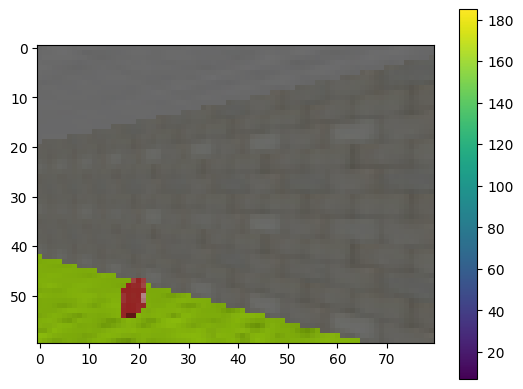

In [4]:
first_img, first_pos = agent._env_reset(env)
first_img, first_pos = agent._obs_postpreprocess(agent.env.step(4), 4)
m = plt.imshow(first_img)
plt.colorbar(m)
agent.vectorhash.store_memory(s=agent.preprocessor.encode(first_img))

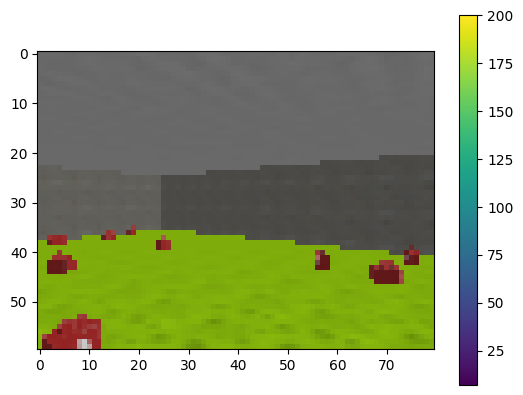

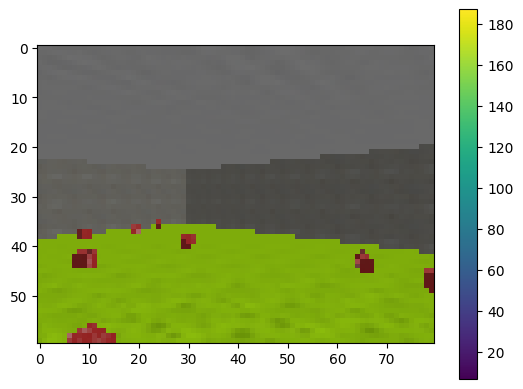

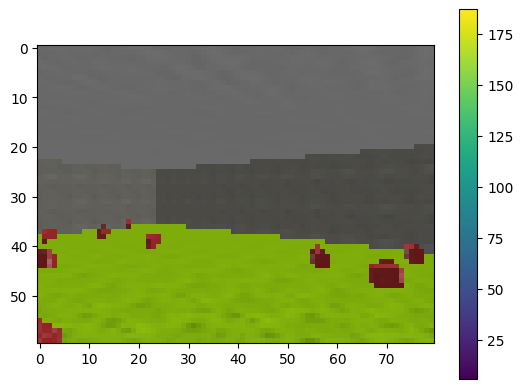

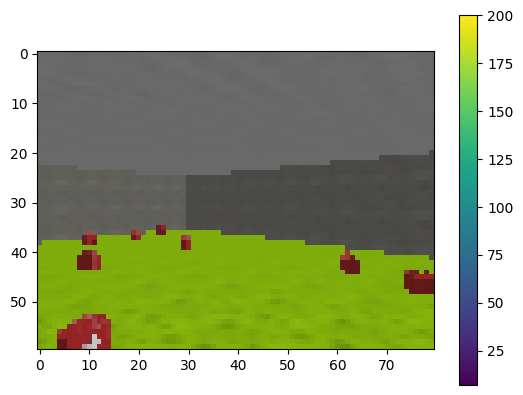

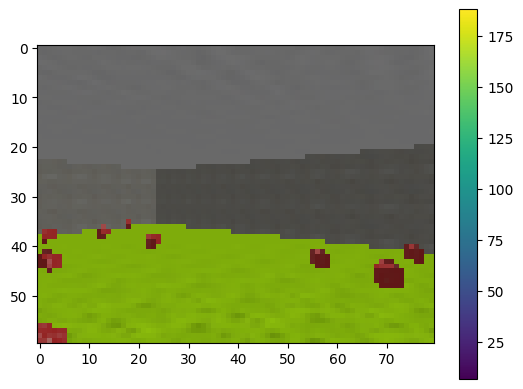

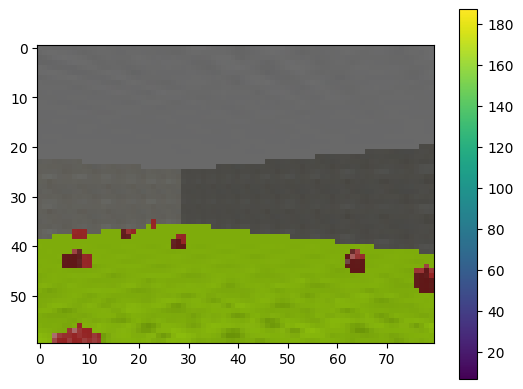

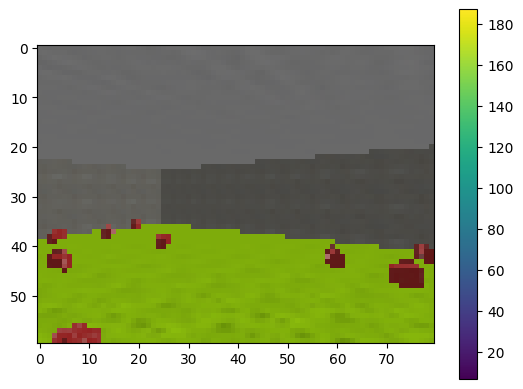

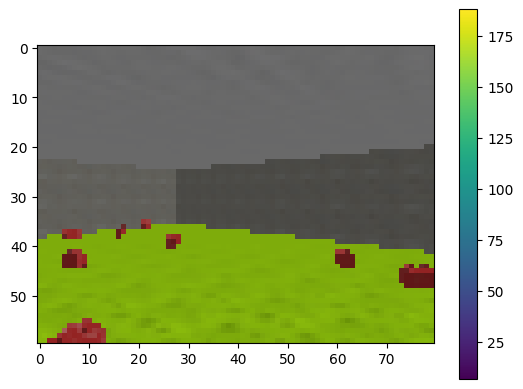

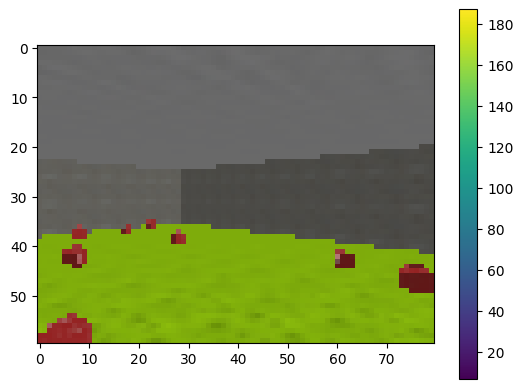

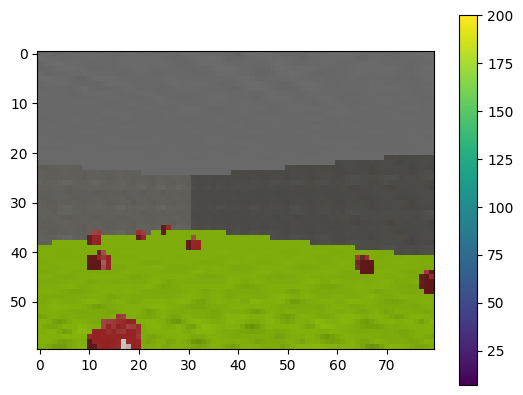

In [5]:
imgs = []
states = []
for sample in samples:
    pos = sample.cpu().numpy()
    agent.set_agent_pos(pos)
    img , _ = agent._obs_postpreprocess(agent.env.step(4), 4)
    obs = agent.preprocessor.encode(img)
    g = agent.vectorhash.scaffold.denoise(
        agent.vectorhash.scaffold.grid_from_hippocampal(
            agent.vectorhash.hippocampal_sensory_layer.hippocampal_from_sensory(obs)
        )
    )
    m = plt.imshow(img)
    plt.colorbar(m)
    plt.show()
    imgs.append(img)
    states.append(g)

In [6]:
print(states)

[tensor([[0.0098, 0.0080, 0.0081, 0.0080, 0.0079, 0.0079, 0.0079, 0.0079, 0.0081,
         0.0081, 0.0081, 0.0077, 0.0079, 0.0080, 0.0078, 0.0081, 0.0082, 0.0080,
         0.0078, 0.0079, 0.0079, 0.0077, 0.0081, 0.0081, 0.0079, 0.0080, 0.0081,
         0.0078, 0.0080, 0.0083, 0.0082, 0.0080, 0.0079, 0.0080, 0.0078, 0.0082,
         0.0078, 0.0075, 0.0081, 0.0080, 0.0082, 0.0080, 0.0080, 0.0079, 0.0080,
         0.0077, 0.0082, 0.0078, 0.0081, 0.0080, 0.0082, 0.0079, 0.0083, 0.0079,
         0.0081, 0.0080, 0.0078, 0.0077, 0.0083, 0.0079, 0.0080, 0.0080, 0.0078,
         0.0079, 0.0080, 0.0082, 0.0080, 0.0077, 0.0081, 0.0082, 0.0080, 0.0079,
         0.0082, 0.0080, 0.0080, 0.0078, 0.0080, 0.0081, 0.0078, 0.0080, 0.0080,
         0.0078, 0.0078, 0.0082, 0.0080, 0.0080, 0.0082, 0.0082, 0.0081, 0.0084,
         0.0082, 0.0081, 0.0078, 0.0081, 0.0080, 0.0080, 0.0080, 0.0080, 0.0081,
         0.0077, 0.0076, 0.0079, 0.0079, 0.0079, 0.0080, 0.0082, 0.0083, 0.0082,
         0.0078, 0.0078, 0.

: 